In [30]:
import pandas as pd
import numpy as np
import pyfolio as pf

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/Realm/HSF20_daily.csv', parse_dates = True, index_col=0)
df.dtypes


Time              object
Open               int64
High               int64
Low                int64
Last               int64
Volume             int64
NumberOfTrades     int64
BidVolume          int64
AskVolume          int64
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1545 entries, 2013-10-08 to 2020-01-16
Data columns (total 9 columns):
Time              1545 non-null object
Open              1545 non-null int64
High              1545 non-null int64
Low               1545 non-null int64
Last              1545 non-null int64
Volume            1545 non-null int64
NumberOfTrades    1545 non-null int64
BidVolume         1545 non-null int64
AskVolume         1545 non-null int64
dtypes: int64(8), object(1)
memory usage: 120.7+ KB


In [31]:
df.head()

,Time,Open,High,Low,Last,Volume,NumberOfTrades,BidVolume,AskVolume
Date,,,,,,,,,
2013-10-08,09:15:00,22873,23224,22860,23163,54939,33499,27284,27655
2013-10-09,09:15:00,22983,23060,22948,23027,35078,21265,17712,17366
2013-10-10,09:15:00,23042,23105,22684,22956,56609,33101,27846,28763
2013-10-11,09:15:00,23300,23386,23201,23235,50276,28583,25636,24640
2013-10-15,09:15:00,23482,23490,23256,23342,34629,21037,17462,17167


In [32]:
df['SMA_Fast'] = df['Last'].rolling(20).mean()
df['SMA_Slow'] = df['Last'].rolling(100).mean()
df.head()

,Time,Open,High,Low,Last,Volume,NumberOfTrades,BidVolume,AskVolume,SMA_Fast,SMA_Slow
Date,,,,,,,,,,,
2013-10-08,09:15:00,22873,23224,22860,23163,54939,33499,27284,27655,NaN,NaN
2013-10-09,09:15:00,22983,23060,22948,23027,35078,21265,17712,17366,NaN,NaN
2013-10-10,09:15:00,23042,23105,22684,22956,56609,33101,27846,28763,NaN,NaN
2013-10-11,09:15:00,23300,23386,23201,23235,50276,28583,25636,24640,NaN,NaN
2013-10-15,09:15:00,23482,23490,23256,23342,34629,21037,17462,17167,NaN,NaN


In [36]:
df['Position'] = np.where(df['SMA_Fast'] > df['SMA_Slow'], 1, -1)
df.dropna(inplace=True)     #drop nan
df['Position']

Date
2014-03-04   -1
2014-03-05   -1
2014-03-06   -1
2014-03-07   -1
2014-03-10   -1
             ..
2020-01-10    1
2020-01-13    1
2020-01-14    1
2020-01-15    1
2020-01-16    1
Name: Position, Length: 1446, dtype: int32

In [35]:
df.tail()

,Time,Open,High,Low,Last,Volume,NumberOfTrades,BidVolume,AskVolume,SMA_Fast,SMA_Slow,Position
Date,,,,,,,,,,,,
2020-01-10,09:15:00,28664,28726,28539,28666,114436,104079,57195,57241,28002.40,26807.31,1
2020-01-13,09:15:00,28715,29039,28715,28962,134450,118843,67085,67365,28117.85,26835.02,1
2020-01-14,09:15:00,29202,29222,28793,28799,140458,123887,72113,68345,28207.20,26860.86,1
2020-01-15,09:15:00,28941,29022,28659,28752,132756,117099,67182,65574,28259.60,26886.07,1
2020-01-16,09:15:00,28852,29040,28738,28895,143074,127992,71122,71952,28325.35,26915.47,1


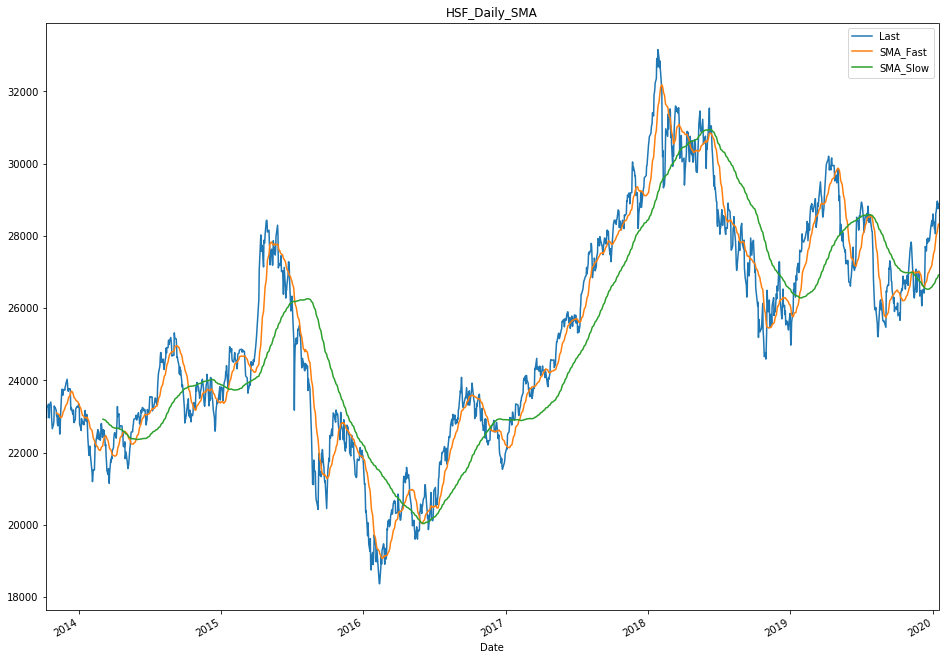

In [40]:
df[['Last','SMA_Fast','SMA_Slow']].plot(figsize = (16,12),title = 'HSF_Daily_SMA' ) #Shift + tab

In [37]:
df['Returns'] = df['Last'].pct_change(1) * df['Position'].shift(1)
df.tail()

,Time,Open,High,Low,Last,Volume,NumberOfTrades,BidVolume,AskVolume,SMA_Fast,SMA_Slow,Position,Returns
Date,,,,,,,,,,,,,
2020-01-10,09:15:00,28664,28726,28539,28666,114436,104079,57195,57241,28002.40,26807.31,1,0.001537
2020-01-13,09:15:00,28715,29039,28715,28962,134450,118843,67085,67365,28117.85,26835.02,1,0.010326
2020-01-14,09:15:00,29202,29222,28793,28799,140458,123887,72113,68345,28207.20,26860.86,1,-0.005628
2020-01-15,09:15:00,28941,29022,28659,28752,132756,117099,67182,65574,28259.60,26886.07,1,-0.001632
2020-01-16,09:15:00,28852,29040,28738,28895,143074,127992,71122,71952,28325.35,26915.47,1,0.004974


In [46]:
df['Cumulative_Returns'] = (df['Returns'] + 1).cumprod()

In [47]:
df['Cumulative_Returns']

Date
2014-03-04         NaN
2014-03-05    1.004287
2014-03-06    1.000097
2014-03-07    1.001600
2014-03-10    1.019644
                ...   
2020-01-10    1.577210
2020-01-13    1.593496
2020-01-14    1.584527
2020-01-15    1.581941
2020-01-16    1.589809
Name: Cumulative_Returns, Length: 1446, dtype: float64

Text(0.5, 0, 'Date')

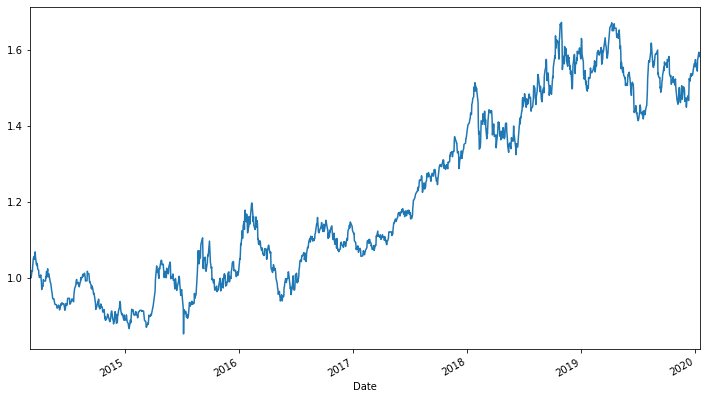

In [49]:
df['Cumulative_Returns'].plot(label='HSF', figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')


In [50]:
pf.show_perf_stats(df['Returns'].dropna())

Start date,2014-03-05
End date,2020-01-16
Total months,68
,Backtest
Annual return,8.4%
Cumulative returns,59.0%
Annual volatility,18.1%
Sharpe ratio,0.54
Calmar ratio,0.39
Stability,0.88
Max drawdown,-21.5%
